In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df = pd.read_csv(r'/work/Community_cross_percent.csv')
df_raw = df.loc[:, df.columns != 'Com_Name']

pca = PCA(n_components=14)

components = pca.fit_transform(df_raw) # This does all the math

print(len(components))

fig = px.scatter(components, x=0, y=1, hover_name=df['Com_Name'], color_discrete_sequence=['red'])
fig.show()

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    labels={'0': 'PC 0', '1': 'PC 1', '2': 'PC 2'},
    hover_name = df['Com_Name'],
    color_discrete_sequence=['red']
)
fig.update_traces(marker_size= 3)
fig.show()

77


Variance Explained by PC 0 and 1 =  0.9304414278650861
Variance Explained by PC 0, 1, and 2 =  0.9613921239696532


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Accommodation'),
  Text(1, 0, 'Business'),
  Text(2, 0, 'Electronic'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Food'),
  Text(5, 0, 'Liquor'),
  Text(6, 0, 'Medical'),
  Text(7, 0, 'Other'),
  Text(8, 0, 'Permits'),
  Text(9, 0, 'Personal Services'),
  Text(10, 0, 'Retail'),
  Text(11, 0, 'Special'),
  Text(12, 0, 'Tabacco'),
  Text(13, 0, 'Vehicles')])

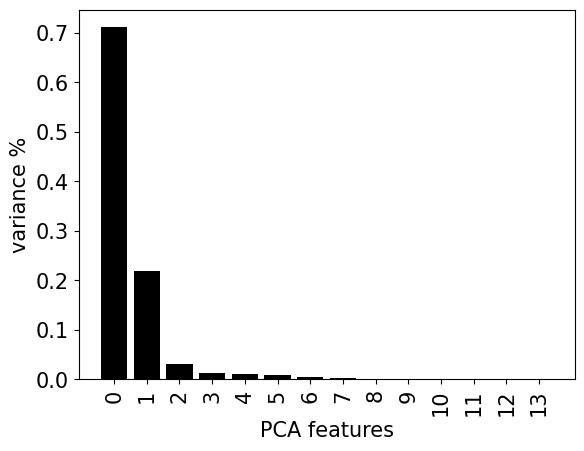

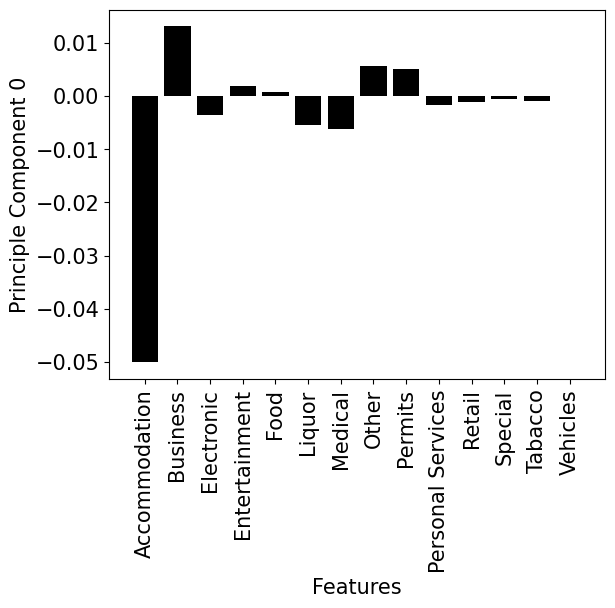

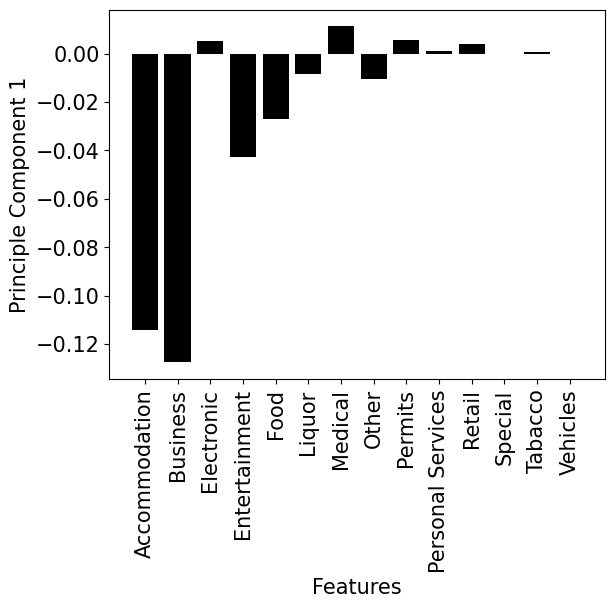

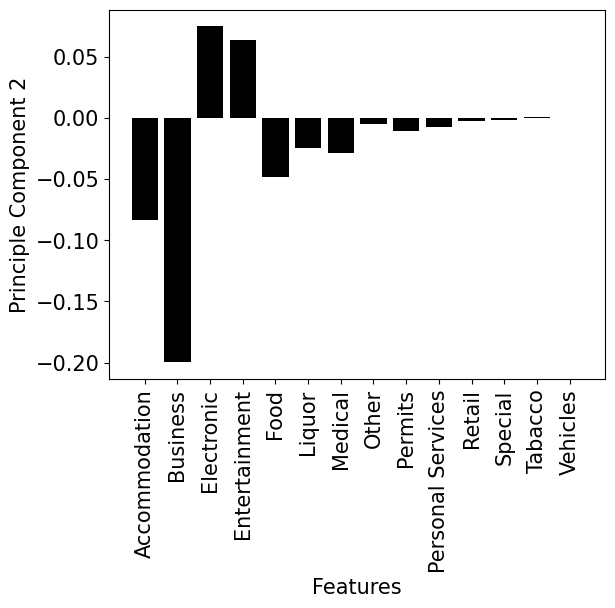

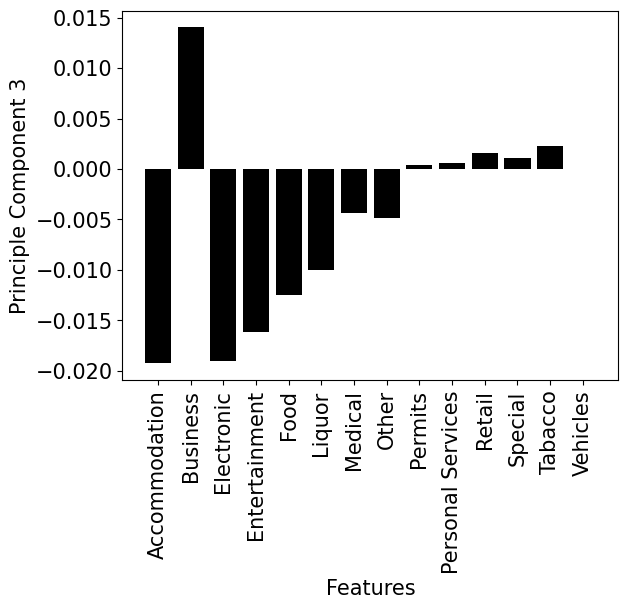

In [ ]:
# Plot the explained variances
features = range(df_raw.shape[1])
plt.figure(1)
plt.rcParams['font.size'] = 15
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features, rotation='vertical')

print("Variance Explained by PC 0 and 1 = ", sum(pca.explained_variance_ratio_[0:2]))
print("Variance Explained by PC 0, 1, and 2 = ", sum(pca.explained_variance_ratio_[0:3]))

# Component 0 Features
plt.figure(2)
plt.bar(df.columns[1:], components[0],color='black')
plt.xlabel('Features')
plt.ylabel('Principle Component 0')
plt.xticks(rotation=90)

# Component 1 Features
plt.figure(3)
plt.bar(df.columns[1:], components[1],color='black')
plt.xlabel('Features')
plt.ylabel('Principle Component 1')
plt.xticks(rotation=90)

# Component 2 Features
plt.figure(4)
plt.bar(df.columns[1:], components[2],color='black')
plt.xlabel('Features')
plt.ylabel('Principle Component 2')
plt.xticks(rotation=90)

# Component n Features
n = 3
plt.figure(5)
plt.bar(df.columns[1:], components[n],color='black')
plt.xlabel('Features')
plt.ylabel(f"Principle Component {n}")
plt.xticks(rotation=90)

In [ ]:
# Trimming Districts with less than 20 business licenses
trim_number = 20
df_vals = pd.read_csv(r'/work/Community_cross.csv')

df_trim = df[df_vals.sum(axis=1, numeric_only=True) >= trim_number]

print("Number of Community Trimmed: ", df.shape[0]-df_trim.shape[0])

df_trim_raw = df_trim.loc[:, df.columns != 'Com_Name']

pca_trim = PCA(n_components=14)

components_trim = pca_trim.fit_transform(df_trim_raw) # This does all the math

fig = px.scatter(components_trim, x=0, y=1, hover_name=df_trim['Com_Name'], color_discrete_sequence=['red'])
fig.show()

fig = px.scatter_3d(
    components_trim, x=0, y=1, z=2,
    labels={'0': 'PC 0', '1': 'PC 1', '2': 'PC 2'},
    hover_name = df_trim['Com_Name']
)
fig.update_traces(marker_size= 3)
fig.show()

Number of Community Trimmed:  1


Variance Explained by PC 0 and 1 =  0.9304414278650861
Variance Explained by PC 0, 1, and 2 =  0.9613921239696532


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Accommodation'),
  Text(1, 0, 'Business'),
  Text(2, 0, 'Electronic'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Food'),
  Text(5, 0, 'Liquor'),
  Text(6, 0, 'Medical'),
  Text(7, 0, 'Other'),
  Text(8, 0, 'Permits'),
  Text(9, 0, 'Personal Services'),
  Text(10, 0, 'Retail'),
  Text(11, 0, 'Special'),
  Text(12, 0, 'Tabacco'),
  Text(13, 0, 'Vehicles')])

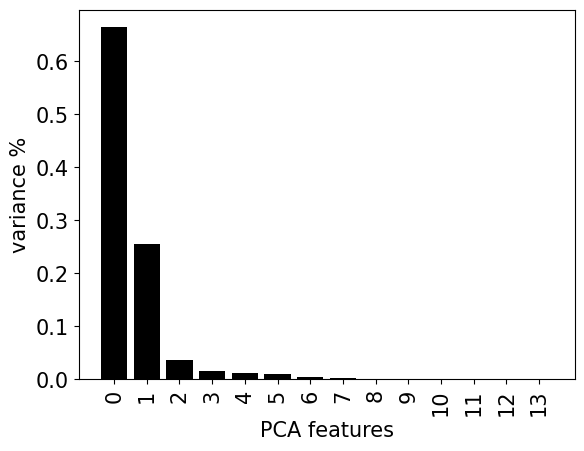

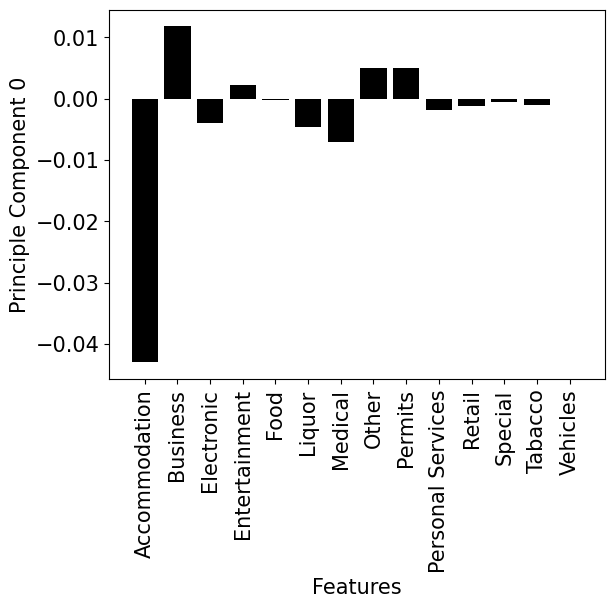

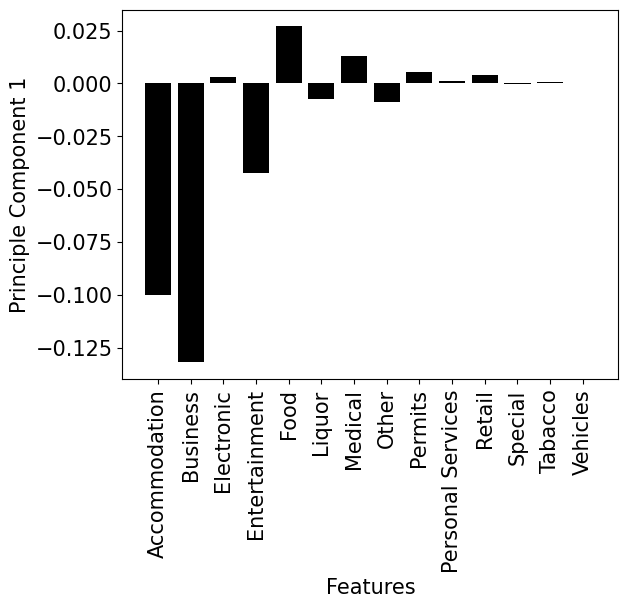

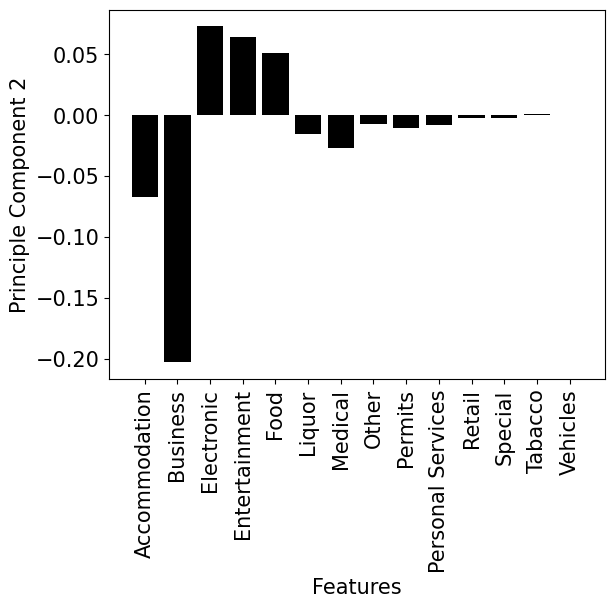

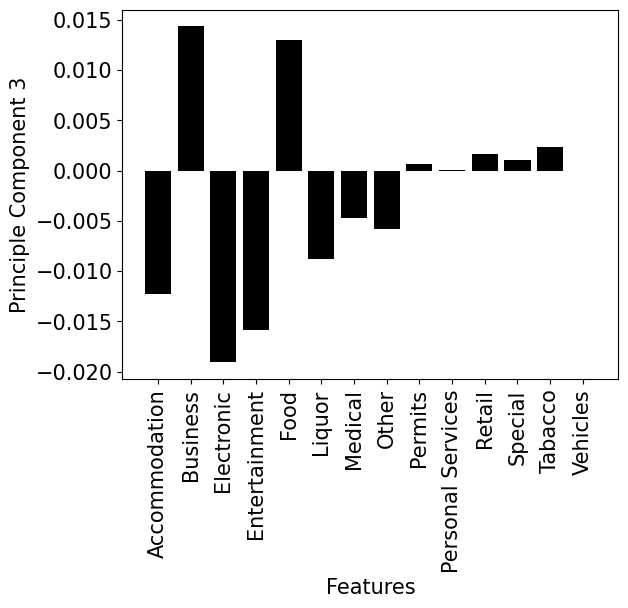

In [ ]:
# Plot the explained variances TRIMMED
features = range(df_trim_raw.shape[1])
plt.figure(1)
plt.bar(features, pca_trim.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features, rotation='vertical')

print("Variance Explained by PC 0 and 1 = ", sum(pca.explained_variance_ratio_[0:2]))
print("Variance Explained by PC 0, 1, and 2 = ", sum(pca.explained_variance_ratio_[0:3]))

# Component 0 Features
plt.figure(2)
plt.bar(df.columns[1:], components_trim[0],color='black')
plt.xlabel('Features')
plt.ylabel('Principle Component 0')
plt.xticks(rotation=90)

# Component 1 Features
plt.figure(3)
plt.bar(df.columns[1:], components_trim[1],color='black')
plt.xlabel('Features')
plt.ylabel('Principle Component 1')
plt.xticks(rotation=90)

# Component 2 Features
plt.figure(4)
plt.bar(df.columns[1:], components_trim[2],color='black')
plt.xlabel('Features')
plt.ylabel('Principle Component 2')
plt.xticks(rotation=90)

# Component n Features
n = 3
plt.figure(5)
plt.bar(df.columns[1:], components_trim[n],color='black')
plt.xlabel('Features')
plt.ylabel(f"Principle Component {n}")
plt.xticks(rotation=90)

In [ ]:
# checking similarity of pc 0 trimmed and not trimmed
import numpy
import math

# checking similarity of pc 0 between TIF and non-TIF
tif_pc0 = [7.84333514e-01, -2.42857274e-01, -9.63799643e-02, -4.87431214e-02, 7.26993709e-02,  4.27580497e-02, -3.64487351e-02, -6.07041086e-03, 3.08118720e-03, -1.58847826e-03, -6.58969828e-04, 4.80042586e-04, -5.56584528e-04, 1.74809317e-17]
tif_pc1 = [3.00831628e-01, -1.14892740e-01, 2.19002693e-02, -1.70134775e-02, 5.30037458e-02, 6.52382422e-02, 2.46434653e-01, -3.03038813e-02, -3.19222999e-03, -2.42565750e-03, -9.20282316e-04, 4.92187423e-05, -9.72579006e-05, -1.12062310e-17]

tif_pc0 = tif_pc0 / numpy.linalg.norm(tif_pc0)
tif_pc1 = tif_pc1 / numpy.linalg.norm(tif_pc1)

non_tif_pc0 = components[0] / numpy.linalg.norm(components[0])
non_tif_pc1 = components[1] / numpy.linalg.norm(components[1])

print("Angle (degrees) between TIF and non-TIF")
print("PC 0: ", math.degrees(math.acos(numpy.clip(numpy.dot(non_tif_pc0, tif_pc0), -1, 1))))
print("PC 1: ", math.degrees(math.acos(numpy.clip(numpy.dot(non_tif_pc1, tif_pc1), -1, 1))))

# plt.figure(1)
# plt.bar(df.columns[1:], tif_pc0,color='black')
# plt.xlabel('Features')
# plt.ylabel('Principle Component 0')
# plt.xticks(rotation=90)

# plt.figure(2)
# plt.bar(df.columns[1:], -non_tif_pc0,color='black')
# plt.xlabel('Features')
# plt.ylabel('Principle Component 0')
# plt.xticks(rotation=90)

Angle (degrees) between TIF and non-TIF
PC 0:  162.11734565786583
PC 1:  103.74128344536821


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41bd1eeb-8ade-41a5-ae81-cf4a88f38197' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>